In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers , models

import tensorflow_datasets as tfds

In [ ]:
df, df_info = tfds.load('food101', shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
df

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('validation'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
train_df , valid_df = df["train"] , df["validation"]

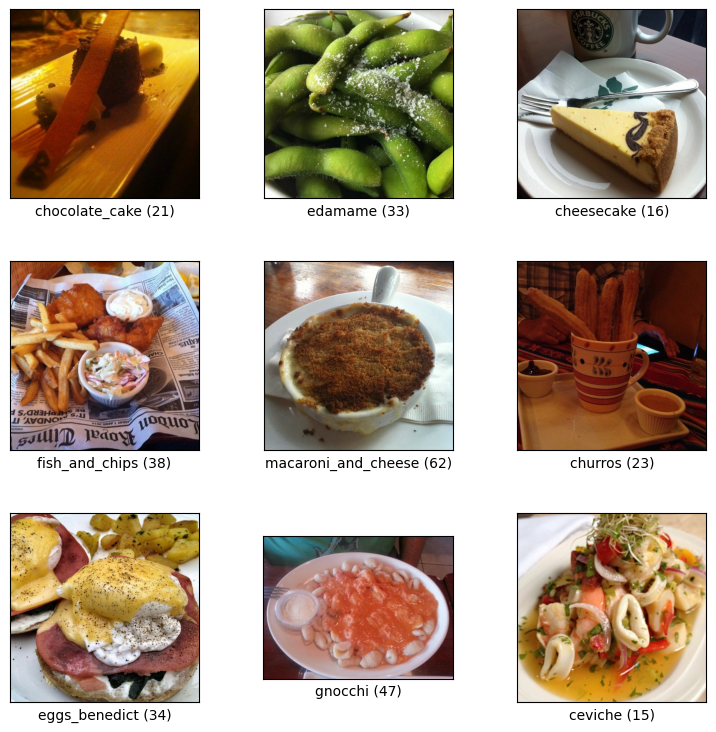

In [ ]:
fig = tfds.show_examples(train_df , df_info)

In [ ]:
MAX_SIDE_LEN = 128
HOT_DOG = 55
train_df = train_df.map(
    lambda image , label : (tf.cast(tf.image.resize(image , [MAX_SIDE_LEN , MAX_SIDE_LEN]), dtype = tf.int32) ,
                            tf.cast(label == HOT_DOG, dtype=tf.int32)) # Provide dtype to the second tf.cast
)

valid_df = valid_df.map(
    lambda image , label : (tf.cast(tf.image.resize(image , [MAX_SIDE_LEN , MAX_SIDE_LEN]), dtype = tf.int32) ,
                            tf.cast(label == HOT_DOG, dtype=tf.int32)) # Provide dtype to the second tf.cast
)

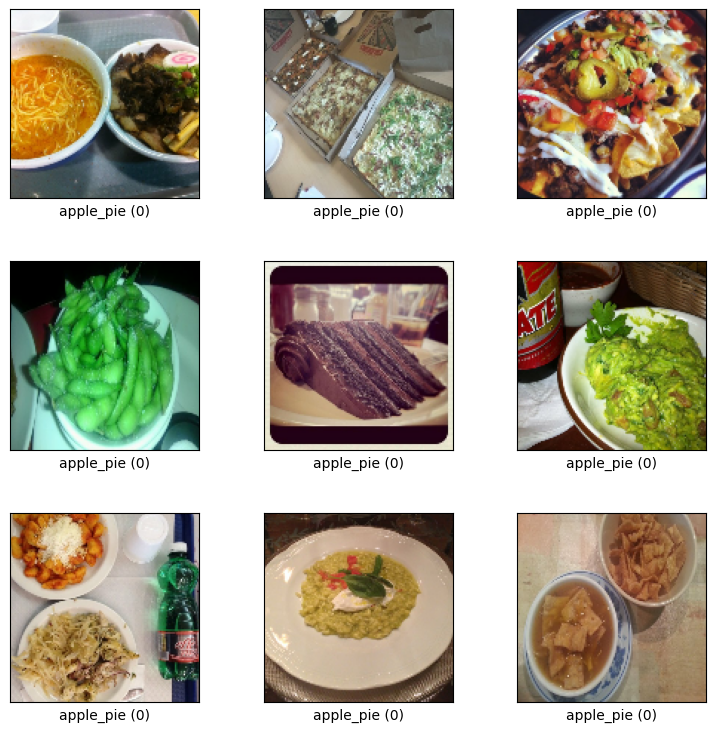

In [ ]:
fig = tfds.show_examples(train_df , df_info)

In [ ]:
train_hd_size , valid_df_size = 750 , 250
train_hotdogs =  train_df.filter(lambda image , label : label == 1).repeat(3)
train_nothotdogs =  train_df.filter(lambda image , label : label == 0)

In [ ]:
valid_hotdogs =  valid_df.filter(lambda image , label : label == 1).repeat(3)
valid_nothotdogs =  valid_df.filter(lambda image , label : label == 0)

In [ ]:
batch_size = 16
train_df = tf.data.Dataset.sample_from_datasets([train_hotdogs , train_nothotdogs] , [0.5 , 0.5] , stop_on_empty_dataset=True)
train_df = train_df.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

valid_df = tf.data.Dataset.sample_from_datasets([valid_hotdogs , valid_nothotdogs] , [0.5 , 0.5] , stop_on_empty_dataset=True)
valid_df = valid_df.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([  # Enclose layers in a list
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(MAX_SIDE_LEN, MAX_SIDE_LEN, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
lr = 0.001
model.compile(optimizer = tf.keras.optimizers.Adam(lr) ,
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ["accuracy"])


In [ ]:
epochs = 100
history = model.fit(train_df, validation_data = valid_df , epochs = epochs , verbose = 1)

Epoch 1/100
    283/Unknown 793s 3s/step - accuracy: 0.5185 - loss: 1.1897

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


283/283 ━━━━━━━━━━━━━━━━━━━━ 952s 3s/step - accuracy: 0.5185 - loss: 1.1888 - val_accuracy: 0.5117 - val_loss: 0.7226
Epoch 2/100
283/283 ━━━━━━━━━━━━━━━━━━━━ 420s 1s/step - accuracy: 0.5182 - loss: 0.7114 - val_accuracy: 0.5117 - val_loss: 0.6962
Epoch 3/100
283/283 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.5182 - loss: 0.6951 - val_accuracy: 0.5117 - val_loss: 0.6936
Epoch 4/100
283/283 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.5182 - loss: 0.6935 - val_accuracy: 0.5117 - val_loss: 0.6933
Epoch 5/100
283/283 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.5182 - loss: 0.6933 - val_accuracy: 0.5117 - val_loss: 0.6932
Epoch 6/100
283/283 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.5182 - loss: 0.6932 - val_accuracy: 0.5117 - val_loss: 0.6932
Epoch 7/100
283/283 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.5182 - loss: 0.6932 - val_accuracy: 0.5117 - val_loss: 0.6932
Epoch 8/100
 73/283 ━━━━━━━━━━━━━━━━━━━━ 4:44 1s/step - accuracy: 0.5366 - loss: 0.6931

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in valid_df.take(1):
  images = image_batch
  labels = label_batch

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(images[i])
  plt.axis("off")

In [ ]:
labels[:9]